In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data load & exploration

In [2]:
file = '../data/classification.xlsx'
D = pd.read_excel(file)

In [3]:
D.describe()

,ad_id,days_from_approvation,num_images,price
count,98416.000000,98416.000000,98265.000000,8.642800e+04
mean,49208.500000,200.422157,3.646090,1.430352e+04
std,28410.396383,315.623538,3.540862,8.261853e+04
min,1.000000,0.000000,0.000000,0.000000e+00
25%,24604.750000,20.000000,1.000000,3.000000e+01
50%,49208.500000,60.000000,3.000000,1.000000e+02
75%,73812.250000,235.000000,5.000000,5.000000e+02
max,98416.000000,3473.000000,30.000000,6.200000e+06


In [4]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98416 entries, 0 to 98415
Data columns (total 9 columns):
ad_id                    98416 non-null int64
days_from_approvation    98416 non-null int64
num_images               98265 non-null float64
ads_is_pro               98416 non-null bool
category                 98416 non-null object
macrocategory_name       98416 non-null object
price                    86428 non-null float64
region                   98416 non-null object
dependent variable       98416 non-null object
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [5]:
D['category'].value_counts().iloc[:5] / D.shape[0]

Arredamento e Casalinghi     0.123212
Accessori Auto               0.118944
Abbigliamento e Accessori    0.081247
Auto                         0.062144
Collezionismo                0.054056
Name: category, dtype: float64

In [6]:
D['macrocategory_name'].value_counts() / D.shape[0]

PER LA CASA e LA PERSONA    0.297259
VEICOLI                     0.292463
SPORTS E HOBBY              0.169332
IMMOBILI                    0.114392
ELETTRONICA                 0.096285
LAVORO E SERVIZI            0.026134
ALTRO                       0.004136
Name: macrocategory_name, dtype: float64

In [7]:
D['dependent variable'].value_counts() / D.shape[0]

cancellato senza alcuna ragione di cancellazione    0.603205
Non venduto                                         0.150687
Venduto su Subito                                   0.111811
active                                              0.099994
Venduto su altri canali                             0.034303
Name: dependent variable, dtype: float64

# Handle null values

In [8]:
D.dropna(inplace=True)

# Encoding classes

In [9]:
from sklearn import preprocessing as pre

In [10]:
target = 'dependent variable'
X, target_values = D[[x for x in D.columns if x != target]], D[target].values

In [12]:
target_values.reshape(-1, 1)

array([['Non venduto'],
       ['cancellato senza alcuna ragione di cancellazione'],
       ['Non venduto'],
       ...,
       ['active'],
       ['active'],
       ['cancellato senza alcuna ragione di cancellazione']], dtype=object)

In [14]:
encoder = pre.OrdinalEncoder()
y = encoder.fit_transform(target_values.reshape(-1, 1))

In [16]:
y

array([[0.],
       [4.],
       [0.],
       ...,
       [3.],
       [3.],
       [4.]])

In [17]:
print(encoder.categories_)
print(encoder.inverse_transform(np.array(
    list(range(len(encoder.categories_[0])))).reshape(-1, 1)))

[array(['Non venduto', 'Venduto su Subito', 'Venduto su altri canali',
       'active', 'cancellato senza alcuna ragione di cancellazione'],
      dtype=object)]
[['Non venduto']
 ['Venduto su Subito']
 ['Venduto su altri canali']
 ['active']
 ['cancellato senza alcuna ragione di cancellazione']]


# Train and test split

In [18]:
from sklearn.model_selection import train_test_split

## Unstratified split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

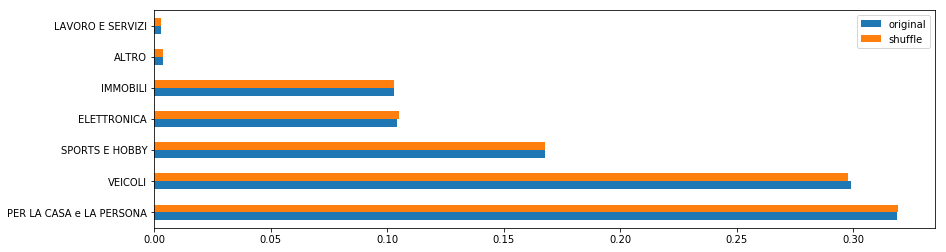

In [20]:
fig, ax = plt.subplots(figsize=(14, 4))
df = pd.DataFrame({
    'original': X.macrocategory_name.value_counts() / X.shape[0],
    'shuffle': X_train.macrocategory_name.value_counts() / X_train.shape[0]})
df.plot.barh(ax=ax, rot=0)
plt.show()

In [25]:
S_train, S_test, s_train, s_test = train_test_split(
    X, y, stratify=X[['category', 'macrocategory_name']], 
    test_size=0.2, random_state=42)

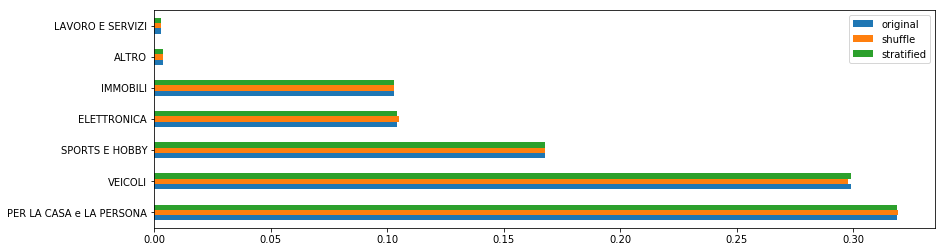

In [26]:
fig, ax = plt.subplots(figsize=(14, 4))
df = pd.DataFrame({
    'original': X.macrocategory_name.value_counts() / X.shape[0],
    'shuffle': X_train.macrocategory_name.value_counts() / X_train.shape[0],
    'stratified': S_train.macrocategory_name.value_counts() / S_train.shape[0],
})
df.plot.barh(ax=ax, rot=0)
plt.show()

In [23]:
df

,original,shuffle,stratified
PER LA CASA e LA PERSONA,0.318945,0.319403,0.318954
VEICOLI,0.299140,0.298037,0.299124
SPORTS E HOBBY,0.167810,0.167698,0.167828
ELETTRONICA,0.104283,0.104990,0.104280
IMMOBILI,0.102904,0.102977,0.102904
ALTRO,0.003836,0.003810,0.003839
LAVORO E SERVIZI,0.003082,0.003085,0.003071


In [27]:
df.corr()

,original,shuffle,stratified
original,1.000000,0.999991,1.000000
shuffle,0.999991,1.000000,0.999991
stratified,1.000000,0.999991,1.000000


In [28]:
S_train.head()

,ad_id,days_from_approvation,num_images,ads_is_pro,category,macrocategory_name,price,region
63295,63296,73,4.0,False,Biciclette,SPORTS E HOBBY,239.0,Lazio
90669,90670,15,5.0,False,Auto,VEICOLI,1200.0,Veneto
858,859,280,1.0,True,Accessori Moto,VEICOLI,90.0,Abruzzo
79983,79984,40,2.0,False,Strumenti Musicali,SPORTS E HOBBY,70.0,Puglia
47206,47207,376,3.0,False,Biciclette,SPORTS E HOBBY,1950.0,Trentino-Alto Adige


# Numeric vs categorical features

In [29]:
n_cols, c_cols = [], []
for i, x in S_train.dtypes.items():
    if i != 'ad_id' and x in [np.int64, np.float64]:
        n_cols.append(i)
    elif i != 'ad_id':
        c_cols.append(i)
    else:
        pass
N_train, C_train = S_train[n_cols], S_train[c_cols]
N_test, C_test = S_test[n_cols], S_test[c_cols]

## Deal with numeric values

In [30]:
N_train.corr()

,days_from_approvation,num_images,price
days_from_approvation,1.000000,-0.098641,-0.011593
num_images,-0.098641,1.000000,0.262845
price,-0.011593,0.262845,1.000000


### Linear transformations

In [31]:
N_std = pre.StandardScaler().fit_transform(N_train)
N_mms = pre.MinMaxScaler().fit_transform(N_train)
N_mab = pre.MaxAbsScaler().fit_transform(N_train)

### Non linear transformations

In [32]:
N_qtl = pre.QuantileTransformer().fit_transform(N_train)
N_pow = pre.PowerTransformer().fit_transform(N_train)
N_norm = pre.Normalizer().fit_transform(N_train)

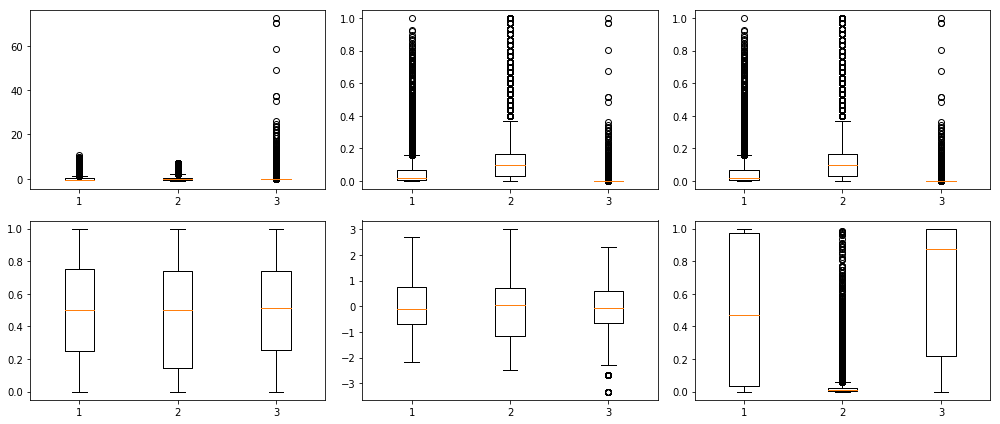

In [33]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(14, 6))
ax[0,0].boxplot(N_std)
ax[0,1].boxplot(N_mms)
ax[0,2].boxplot(N_mab)
ax[1,0].boxplot(N_qtl)
ax[1,1].boxplot(N_pow)
ax[1,2].boxplot(N_norm)
plt.tight_layout()
plt.show()

In [34]:
print(N_std.mean(axis=0), N_std.std(axis=0))
print(N_mms.mean(axis=0), N_mms.std(axis=0))
print(N_mab.mean(axis=0), N_mab.std(axis=0))
print(N_qtl.mean(axis=0), N_qtl.std(axis=0))
print(N_pow.mean(axis=0), N_pow.std(axis=0))
print(N_norm.mean(axis=0), N_norm.std(axis=0))

[ 4.44635999e-17 -6.23725498e-17 -4.11699999e-18] [1. 1. 1.]
[0.05718903 0.12612008 0.00233659] [0.08955431 0.11938215 0.01373122]
[0.05718903 0.12612008 0.00233659] [0.08955431 0.11938215 0.01373122]
[0.49977571 0.49971549 0.50003892] [0.28907347 0.28567414 0.28859997]
[-1.66738500e-16  4.58016249e-16 -4.03465999e-17] [1. 1. 1.]
[0.49781998 0.02318968 0.65093613] [0.41809777 0.04843616 0.38828837]


## Discretize numbers

In [36]:
N_bin = pre.KBinsDiscretizer(n_bins=[2, 4, 3], 
                             encode='ordinal').fit_transform(N_train)
N_thr = pre.Binarizer(threshold=0.02).fit_transform(N_mms)

In [38]:
np.array(N_train)[:2,:]

array([[  73.,    4.,  239.],
       [  15.,    5., 1200.]])

In [39]:
N_bin[:2,:]

array([[1., 2., 1.],
       [0., 3., 2.]])

In [40]:
N_train.iloc[:5]

,days_from_approvation,num_images,price
63295,73,4.0,239.0
90669,15,5.0,1200.0
858,280,1.0,90.0
79983,40,2.0,70.0
47206,376,3.0,1950.0


In [41]:
N_bin[:5,:]

array([[1., 2., 1.],
       [0., 3., 2.],
       [1., 1., 1.],
       [0., 1., 1.],
       [1., 2., 2.]])

In [42]:
N_thr[:5,:]

array([[1., 1., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [0., 1., 0.],
       [1., 1., 0.]])

## Deal with categorical values

In [43]:
hot = pre.OneHotEncoder()
C_hot = hot.fit_transform(C_train)

In [44]:
print(C_hot[[0,1000]])

  (0, 50)	1.0
  (0, 42)	1.0
  (0, 12)	1.0
  (0, 0)	1.0
  (1, 52)	1.0
  (1, 38)	1.0
  (1, 31)	1.0
  (1, 0)	1.0


In [45]:
print(type(C_hot))
print(hot.categories_)

<class 'scipy.sparse.csr.csr_matrix'>
[array([False,  True]), array(['Abbigliamento e Accessori', 'Accessori Auto', 'Accessori Moto',
       'Altri', 'Animali', 'Appartamenti', 'Arredamento e Casalinghi',
       'Attrezzature di lavoro', 'Audio/Video', 'Auto', 'Biciclette',
       'Camere/Posti letto', 'Candidati in cerca di lavoro',
       'Caravan e Camper', 'Case vacanza', 'Collezionismo',
       'Console e Videogiochi', 'Elettrodomestici', 'Fotografia',
       'Garage e box', 'Giardino e Fai da te', 'Informatica',
       'Libri e Riviste', 'Moto e Scooter', 'Musica e Film', 'Nautica',
       'Offerte di lavoro', 'Sports', 'Strumenti Musicali', 'Telefonia',
       'Terreni e rustici', 'Tutto per i bambini',
       'Uffici e Locali commerciali', 'Veicoli commerciali',
       'Ville singole e a schiera'], dtype=object), array(['ALTRO', 'ELETTRONICA', 'IMMOBILI', 'LAVORO E SERVIZI',
       'PER LA CASA e LA PERSONA', 'SPORTS E HOBBY', 'VEICOLI'],
      dtype=object), array(['Abruzzo', 

In [46]:
hot2 = pre.OneHotEncoder(sparse=False)
C_hot2 = hot2.fit_transform(C_train)

In [47]:
C_hot2[[0,1000]]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [48]:
C_train.iloc[0]

ads_is_pro                     False
category                  Biciclette
macrocategory_name    SPORTS E HOBBY
region                         Lazio
Name: 63295, dtype: object

In [49]:
for x in np.where(C_hot2[0] > 0)[0]:
    print(hot2.get_feature_names()[x])

x0_False
x1_Biciclette
x2_SPORTS E HOBBY
x3_Lazio


## Correlation with target

In [51]:
encoder.categories_[0]

array(['Non venduto', 'Venduto su Subito', 'Venduto su altri canali',
       'active', 'cancellato senza alcuna ragione di cancellazione'],
      dtype=object)

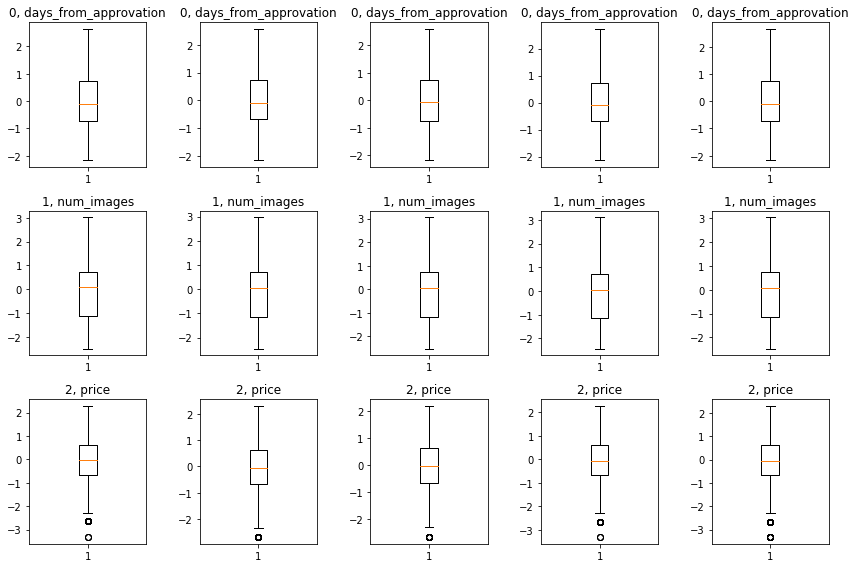

In [52]:
fig, ax = plt.subplots(ncols=len(encoder.categories_[0]), nrows=len(N_train.columns), figsize=(12, 8))
for j, cat in enumerate(encoder.categories_[0]):
    cat_indexes = np.where(y_train.ravel() == j)[0]
    for i, c in enumerate(N_train.columns):
        V = N_train.iloc[cat_indexes][[c]]
        ax[i,j].boxplot(pre.PowerTransformer().fit_transform(V.values))
        ax[i,j].set_title("{}, {}".format(i, c))
plt.tight_layout()
plt.show()

For categorical features, we aim at estimating $P(f \mid C)$

In [53]:
C_train.head()

,ads_is_pro,category,macrocategory_name,region
63295,False,Biciclette,SPORTS E HOBBY,Lazio
90669,False,Auto,VEICOLI,Veneto
858,True,Accessori Moto,VEICOLI,Abruzzo
79983,False,Strumenti Musicali,SPORTS E HOBBY,Puglia
47206,False,Biciclette,SPORTS E HOBBY,Trentino-Alto Adige


In [54]:
P = {}
column = 'macrocategory_name'
for j, cat in enumerate(encoder.categories_[0]):
    P[cat] = {}
    cat_indexes = np.where(y_train.ravel() == j)[0]
    subset = C_train.iloc[cat_indexes]
    count = subset.groupby(column).size()
    for i, v in count.items():
        P[cat][i] = v
P = pd.DataFrame(P)

In [59]:
P / P.sum(axis=0)

,Non venduto,Venduto su Subito,Venduto su altri canali,active,cancellato senza alcuna ragione di cancellazione
ALTRO,0.003623,0.003228,0.002750,0.004610,0.003954
ELETTRONICA,0.107255,0.102297,0.112770,0.112416,0.102060
IMMOBILI,0.104109,0.101800,0.099804,0.106468,0.102424
LAVORO E SERVIZI,0.003432,0.003228,0.002750,0.002528,0.003057
PER LA CASA e LA PERSONA,0.319096,0.327995,0.306483,0.320000,0.317751
SPORTS E HOBBY,0.170274,0.162880,0.179961,0.156431,0.169283
VEICOLI,0.292211,0.298572,0.295481,0.297546,0.301473


In [60]:
(P.T / P.sum(axis=1)).sum(axis=0)

ALTRO                       1.0
ELETTRONICA                 1.0
IMMOBILI                    1.0
LAVORO E SERVIZI            1.0
PER LA CASA e LA PERSONA    1.0
SPORTS E HOBBY              1.0
VEICOLI                     1.0
dtype: float64

## Dimensionality reduction

In [61]:
from sklearn.decomposition import PCA

In [74]:
pca = PCA(n_components=2)
N2_train = pca.fit_transform(C_hot2)
#    pre.PowerTransformer().fit_transform(N_train))

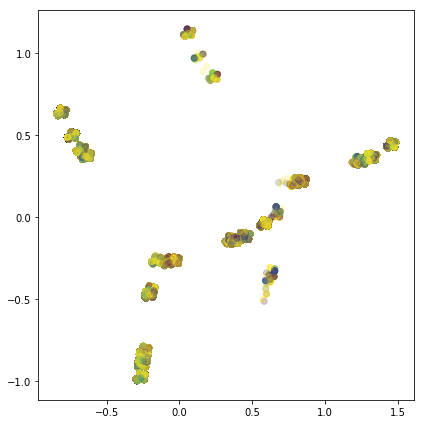

In [75]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(N2_train[:,0], N2_train[:,1], alpha=0.2,
          c=s_train.ravel())
plt.tight_layout()
plt.show()